<h1 style="text-align:center;font-family: 'Computer Modern Sans';font-weight:bolder">Proyecto Electivo Inteligencia Artificial</h1>
<h5 style="text-align:center;font-family: 'Computer Modern Sans';font-weight:bolder">Bayron Alex Parada Reyes</h5>

## **Análisis de cantidad de pacientes uci por región con regresores extra**

### Descripción del Problema



### Información del conjunto de datos



In [76]:
#Importamos las librerías
import pandas as pd
import numpy as np

#Librerías visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv("Uci.csv")
print(f"Dataframe Shape {df.shape}") 
df

Dataframe Shape (16, 638)


,Region,Codigo region,Poblacion,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,...,2021-12-17,2021-12-18,2021-12-19,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26
0,Arica y Parinacota,15,252110,0,0,0,0,2,4,4,...,1,1,1,1,1,1,1,1,1,1
1,Tarapacá,1,382773,1,1,1,1,1,2,2,...,10,10,9,9,8,8,8,8,7,6
2,Antofagasta,2,691854,3,4,3,3,3,3,2,...,16,17,17,19,17,18,19,18,18,14
3,Atacama,3,314709,0,0,0,0,0,0,0,...,3,3,3,2,3,3,3,3,3,4
4,Coquimbo,4,836096,1,1,1,2,1,1,2,...,17,15,15,15,16,16,16,14,15,15
5,Valparaíso,5,1960170,14,17,18,22,27,22,21,...,57,55,55,55,52,49,48,44,42,39
6,Metropolitana,13,8125072,83,90,107,129,146,161,160,...,316,315,311,309,307,285,286,268,266,260
7,O’Higgins,6,991063,5,5,5,5,5,6,6,...,19,18,19,18,18,17,16,15,16,15
8,Maule,7,1131939,3,3,3,3,4,5,7,...,17,16,15,15,13,14,15,12,12,12
9,Ñuble,16,511551,7,8,10,11,10,11,13,...,11,10,9,9,8,8,9,9,8,8


La idea será lograr trabajar la data con los casos totales y por lo tanto se le tradrá que preguntar al usuario con cuantos días quiere de dato quiere trabajar

In [78]:
df = df.drop(columns='Codigo region')

In [79]:
df['Casos totales UCI'] = df['2021-12-26']
df

,Region,Poblacion,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,...,2021-12-18,2021-12-19,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,Casos totales UCI
0,Arica y Parinacota,252110,0,0,0,0,2,4,4,5,...,1,1,1,1,1,1,1,1,1,1
1,Tarapacá,382773,1,1,1,1,1,2,2,2,...,10,9,9,8,8,8,8,7,6,6
2,Antofagasta,691854,3,4,3,3,3,3,2,2,...,17,17,19,17,18,19,18,18,14,14
3,Atacama,314709,0,0,0,0,0,0,0,1,...,3,3,2,3,3,3,3,3,4,4
4,Coquimbo,836096,1,1,1,2,1,1,2,1,...,15,15,15,16,16,16,14,15,15,15
5,Valparaíso,1960170,14,17,18,22,27,22,21,20,...,55,55,55,52,49,48,44,42,39,39
6,Metropolitana,8125072,83,90,107,129,146,161,160,174,...,315,311,309,307,285,286,268,266,260,260
7,O’Higgins,991063,5,5,5,5,5,6,6,6,...,18,19,18,18,17,16,15,16,15,15
8,Maule,1131939,3,3,3,3,4,5,7,8,...,16,15,15,13,14,15,12,12,12,12
9,Ñuble,511551,7,8,10,11,10,11,13,13,...,10,9,9,8,8,9,9,8,8,8


In [80]:
df = df.drop(df.columns[2:637], axis='columns')
df

,Region,Poblacion,Casos totales UCI
0,Arica y Parinacota,252110,1
1,Tarapacá,382773,6
2,Antofagasta,691854,14
3,Atacama,314709,4
4,Coquimbo,836096,15
5,Valparaíso,1960170,39
6,Metropolitana,8125072,260
7,O’Higgins,991063,15
8,Maule,1131939,12
9,Ñuble,511551,8


In [81]:
df.describe()

,Poblacion,Casos totales UCI
count,1.600000e+01,16.000000
mean,1.216144e+06,34.500000
std,1.914966e+06,63.516927
min,1.072970e+05,1.000000
25%,3.657570e+05,7.750000
50%,7.639750e+05,13.000000
75%,1.043742e+06,25.500000
max,8.125072e+06,260.000000


In [89]:
df1=pd.read_csv("CasosTotalesCumulativo.csv")
df1['Casos totales Contagiados'] = df1['2021-12-26']
df1 = df1.drop(df1.columns[1:665], axis='columns')
df1

,Region,Casos totales Contagiados
0,Arica y Parinacota,29062
1,Tarapacá,44765
2,Antofagasta,66714
3,Atacama,30702
4,Coquimbo,54641
5,Valparaíso,137614
6,Metropolitana,751245
7,O’Higgins,73085
8,Maule,109536
9,Ñuble,39377


##### 

In [90]:
df['Casos totales Contagiados'] = df1['Casos totales Contagiados']
df

,Region,Poblacion,Casos totales UCI,Casos totales Contagiados
0,Arica y Parinacota,252110,1,29062
1,Tarapacá,382773,6,44765
2,Antofagasta,691854,14,66714
3,Atacama,314709,4,30702
4,Coquimbo,836096,15,54641
5,Valparaíso,1960170,39,137614
6,Metropolitana,8125072,260,751245
7,O’Higgins,991063,15,73085
8,Maule,1131939,12,109536
9,Ñuble,511551,8,39377


In [93]:
df2=pd.read_csv("regresores.csv")
df2

,Region,Ingresomedio,Psu,Desempleados,Inmigrante
0,Arica y Parinacota,301222,472,4400,4093
1,Tarapacá,400108,482,13800,9638
2,Antofagasta,502037,492,18800,27652
3,Atacama,380000,482,10500,3912
4,Coquimbo,281149,493,27500,4093
5,Valparaíso,320086,494,61400,9476
6,Metropolitana,375101,512,224700,153230
7,O’Higgins,300081,495,27100,3052
8,Maule,276120,497,19100,2638
9,Ñuble,341791,486,35020,15795


In [94]:
df['Ingresomedio'] = df2['Ingresomedio']
df['Psu'] = df2['Psu']
df['Desempleados'] = df2['Desempleados']
df['Inmigrante'] = df2['Inmigrante']
df

,Region,Poblacion,Casos totales UCI,Casos totales Contagiados,Ingresomedio,Psu,Desempleados,Inmigrante
0,Arica y Parinacota,252110,1,29062,301222,472,4400,4093
1,Tarapacá,382773,6,44765,400108,482,13800,9638
2,Antofagasta,691854,14,66714,502037,492,18800,27652
3,Atacama,314709,4,30702,380000,482,10500,3912
4,Coquimbo,836096,15,54641,281149,493,27500,4093
5,Valparaíso,1960170,39,137614,320086,494,61400,9476
6,Metropolitana,8125072,260,751245,375101,512,224700,153230
7,O’Higgins,991063,15,73085,300081,495,27100,3052
8,Maule,1131939,12,109536,276120,497,19100,2638
9,Ñuble,511551,8,39377,341791,486,35020,15795


In [95]:
df.describe()

,Poblacion,Casos totales UCI,Casos totales Contagiados,Ingresomedio,Psu,Desempleados,Inmigrante
count,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1.216144e+06,34.500000,112514.625000,341791.312500,491.437500,35020.000000,15202.375000
std,1.914966e+06,63.516927,175719.389688,69776.764921,8.586569,54115.052743,37475.228488
min,1.072970e+05,1.000000,10264.000000,250807.000000,472.000000,1400.000000,446.000000
25%,3.657570e+05,7.750000,37208.250000,297519.500000,489.000000,9475.000000,1720.750000
50%,7.639750e+05,13.000000,60677.500000,310654.000000,493.000000,18950.000000,3822.000000
75%,1.043742e+06,25.500000,105180.000000,385000.000000,494.250000,32380.000000,9516.500000
max,8.125072e+06,260.000000,751245.000000,502037.000000,512.000000,224700.000000,153230.000000


### Análisis Exploratorio univariado

In [96]:
def graficos(var):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.title("Histograma")
    sns.distplot(df[var]);
    plt.subplot(1,2,2)
    plt.title("Boxplot")
    sns.boxplot(df[var]);

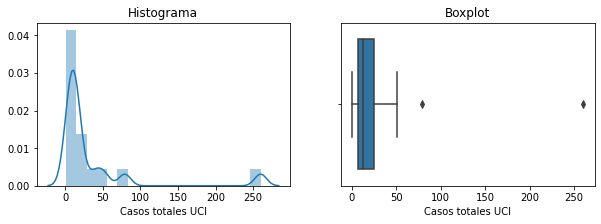

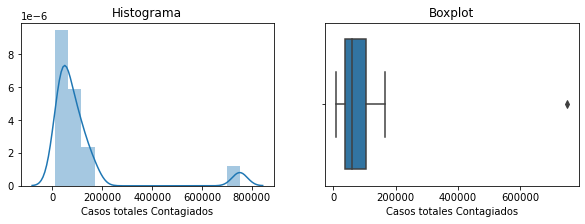

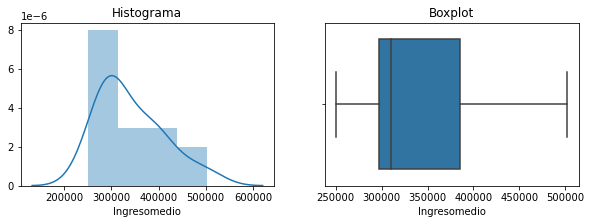

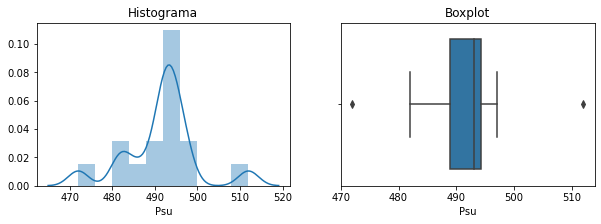

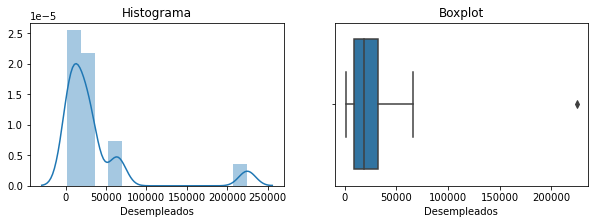

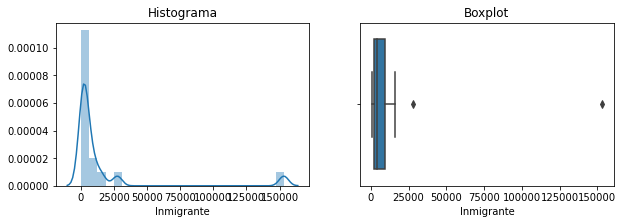

In [98]:
graficos("Casos totales UCI")
graficos("Casos totales Contagiados")
graficos("Ingresomedio")
graficos("Psu")
graficos("Desempleados")
graficos("Inmigrante")

### Análisis Exploratorio multivariado

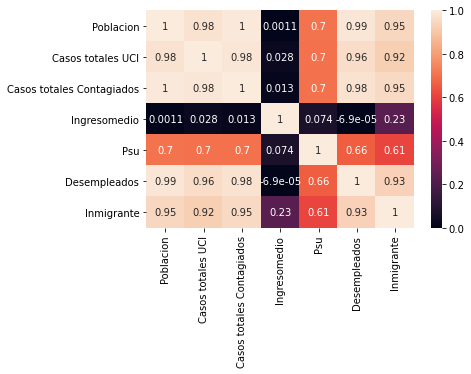

In [99]:
corr=df.corr()
sns.heatmap(corr, annot=True);

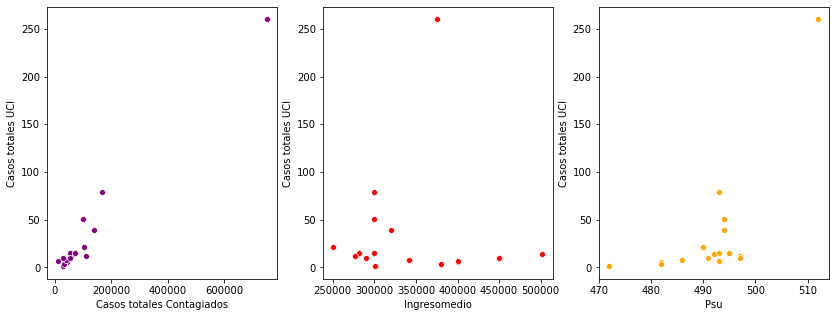

In [102]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(df["Casos totales Contagiados"],df["Casos totales UCI"], color="Purple");
plt.subplot(1,3,2)
sns.scatterplot(df["Ingresomedio"],df["Casos totales UCI"], color="Red");
plt.subplot(1,3,3)
sns.scatterplot(df["Psu"],df["Casos totales UCI"], color="Orange");


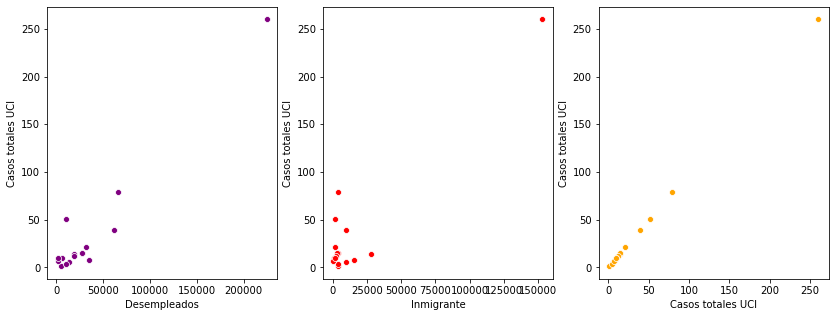

In [103]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(df["Desempleados"],df["Casos totales UCI"], color="Purple");
plt.subplot(1,3,2)
sns.scatterplot(df["Inmigrante"],df["Casos totales UCI"], color="Red");
plt.subplot(1,3,3)
sns.scatterplot(df["Casos totales UCI"],df["Casos totales UCI"], color="Orange");